In [1]:
#28/07/24
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from IPython import display

#Load dataset

In [3]:
iris=sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [6]:
iris.shape

(150, 5)

In [8]:
iris.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [14]:
iris.duplicated().sum()

1

In [16]:
iris=iris.drop_duplicates()

In [18]:
iris.duplicated().sum()

0

In [20]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
iris['species']=labelencoder.fit_transform(iris['species'])

In [24]:
iris['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 149, dtype: int32

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [32]:
#assign all the features to x and target column as y
#divide the data into train and test
X=iris.drop(columns=['species'])
y=iris['species'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
X_train.shape       #there are 4 features 

(119, 4)

In [40]:
#let us make make uniform scaling of all features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.transform(X_test)

In [42]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [44]:
model=Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=4))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='Adam',loss='categorical_crossentropy')

In [113]:
#Now let us define Artificial Neural Network(ANN model)

In [50]:
#history= model.fit(X_train,y_train,epochs=10)
history=model.fit(X_train, y_train, epochs=10)

Epoch 1/10


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0000e+00
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0000e+00 


In [52]:
#now let us check final weights after training
model.layers[0].get_weights()

[array([[-0.37174898,  0.03191917,  0.8164614 ],
        [-0.9446715 ,  0.14325799, -0.46348864],
        [ 0.20928533, -0.29022765,  0.50297743],
        [-0.47292954,  0.5362264 ,  0.70889837]], dtype=float32),
 array([-0.01861481, -0.00713002, -0.04022131], dtype=float32)]

In [54]:
model.layers[1].get_weights()

[array([[ 0.21770068],
        [-0.50640196],
        [ 1.1750149 ]], dtype=float32),
 array([0.00675], dtype=float32)]

In [56]:
y_log=model.predict(X_test_trf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [58]:
y_log  #the result produced is in the form of probablity

array([[0.6922951 ],
       [0.68306386],
       [0.6142691 ],
       [0.64985645],
       [0.48839703],
       [0.69759405],
       [0.69230306],
       [0.61208564],
       [0.7294907 ],
       [0.6124368 ],
       [0.45344263],
       [0.46861663],
       [0.6903124 ],
       [0.49143994],
       [0.47817484],
       [0.70519805],
       [0.7080889 ],
       [0.6691589 ],
       [0.4602386 ],
       [0.50685227],
       [0.47890228],
       [0.5091984 ],
       [0.60771465],
       [0.47191238],
       [0.6960357 ],
       [0.6428255 ],
       [0.64862883],
       [0.48639634],
       [0.47768235],
       [0.70804864]], dtype=float32)

In [60]:
y_pred=np.where(y_log>0.33,1,0)

In [62]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.3333333333333333

In [66]:
model=Sequential()

model.add(Dense(3,activation='relu',input_dim=4))
model.add(Dense(3,activation ='relu',input_dim=4))

model.add(Dense(1,activation ='sigmoid'))

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
history= model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.4434 - loss: -0.1316 - val_accuracy: 0.4583 - val_loss: -0.0642
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3050 - loss: -0.2194 - val_accuracy: 0.4583 - val_loss: -0.0858
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3206 - loss: -0.2163 - val_accuracy: 0.4583 - val_loss: -0.1073
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2933 - loss: -0.2633 - val_accuracy: 0.4583 - val_loss: -0.1290
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3050 - loss: -0.2148 - val_accuracy: 0.4583 - val_loss: -0.1505
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3167 - loss: -0.3278 - val_accuracy: 0.4583 - val_loss: -0.1725
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3089 - loss: -0.3215 - val_accuracy: 0.4583 - val_loss: -0.1943
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3245 - loss: -0.2610 - val_accuracy: 0.

In [74]:
model.layers[0].get_weights()

[array([[-0.349993  ,  1.0774109 , -0.19075602],
        [ 0.06595158, -0.9770222 ,  0.3710901 ],
        [ 1.3032265 ,  0.5503389 ,  0.99578726],
        [ 1.1375935 ,  1.0780121 ,  0.9986701 ]], dtype=float32),
 array([0.42164046, 0.3272463 , 0.3565276 ], dtype=float32)]

In [76]:
model.layers[1].get_weights()

[array([[ 0.46486688,  1.0703601 ,  0.1779897 ],
        [ 0.02289594,  1.2413349 , -0.76797515],
        [-0.52036035,  0.52312577,  0.6054158 ]], dtype=float32),
 array([-0.23974282,  0.24108994, -0.08313444], dtype=float32)]

In [78]:
y_log=model.predict(X_test_trf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


In [80]:
y_pred=np.where(y_log>0.66,1,0)

In [82]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1]])

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)   #now accuracy has improved then earlier

0.7333333333333333

In [86]:
history.history 

{'accuracy': [0.378947377204895,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,
  0.3052631616592407,

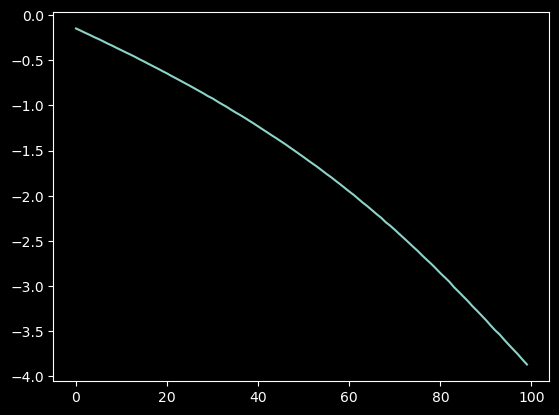

In [88]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

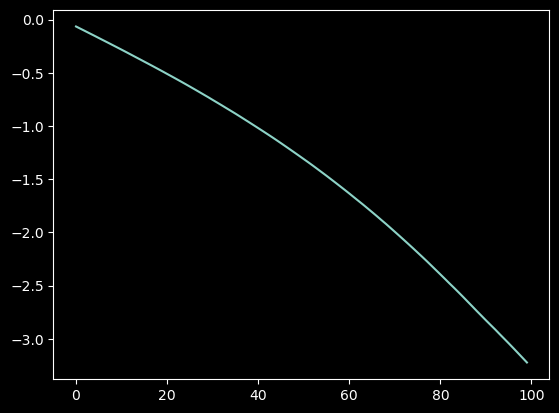

In [90]:
plt.plot(history.history['val_loss'])

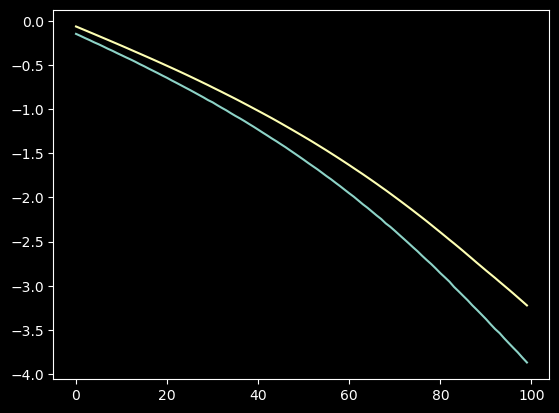

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])